Text(0, 0.5, 'Rate (normalized to one at peak)')

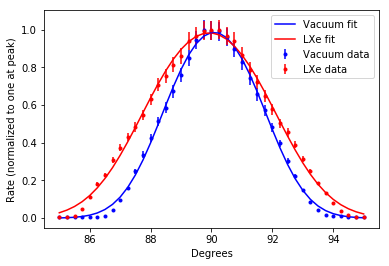

In [148]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize, integrate

vac_filename = "/global/homes/r/rjsmith/OpticalPlotting/Vacuum measurements after 3rd xenon run/Jan 9-12/Power/2019_01_10__09_36_28.txt"
vac_file = open(vac_filename)
vac_lines = vac_file.readlines()
vac_data = np.loadtxt(vac_filename,skiprows = 12)
vac_incidentpower = float(vac_lines[8][16:-1])
vac_intensities = np.array([datum[1] for datum in vac_data])
vac_relative_intensities = vac_intensities/vac_incidentpower
vac_angles = np.array([datum[0] for datum in vac_data])
vac_err = np.sqrt(20**2+(0.05*vac_intensities)**2)
vac_relative_err = vac_err/vac_incidentpower

lxe_filename = "/global/homes/r/rjsmith/OpticalPlotting/3rd Xenon Run Measurements/Power and background at 178 nm/2018_12_19__16_42_47.txt"
lxe_file = open(lxe_filename)
lxe_lines = lxe_file.readlines()
lxe_data = np.loadtxt(lxe_filename,skiprows = 12)
lxe_incidentpower = float(lxe_lines[8][16:-1])
lxe_intensities = np.array([datum[1] for datum in lxe_data])
lxe_relative_intensities = lxe_intensities/lxe_incidentpower
lxe_angles = np.array([datum[0] for datum in lxe_data])
lxe_err = np.sqrt(100**2+(0.05*lxe_intensities)**2)
lxe_relative_err = lxe_err/lxe_incidentpower

def gauss(x,A,mu,sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))
def beam_model(angle,A,sigma,mu,width):
    return list(map(lambda x: integrate.quad(gauss,x-width/2,x+width/2,args=(A,mu,sigma))[0],angle))

vac_fit_params, vac_fit_cov = optimize.curve_fit(beam_model,vac_angles,vac_relative_intensities,p0=[1,10,90,4])
lxe_fit_params, lxe_fit_cov = optimize.curve_fit(beam_model,lxe_angles,lxe_relative_intensities,p0 = [1,10,90,4])

plt.errorbar(vac_angles,vac_relative_intensities,vac_relative_err,fmt ='b.')
plt.plot(vac_angles,beam_model(vac_angles,vac_fit_params[0],vac_fit_params[1],vac_fit_params[2],vac_fit_params[3]),'b')
plt.errorbar(lxe_angles,lxe_relative_intensities,lxe_relative_err,fmt ='r.')
plt.plot(lxe_angles,beam_model(lxe_angles,lxe_fit_params[0],lxe_fit_params[1],lxe_fit_params[2],lxe_fit_params[3]),'r')
plt.legend(['Vacuum fit','LXe fit','Vacuum data','LXe data'])
plt.xlabel('Degrees')
plt.ylabel('Rate (normalized to one at peak)')
#plt.yscale('log')

In [143]:
print(vac_fit_params)

[ -0.41065147  -1.09281529  90.08996612  -3.36924215]


In [144]:
print(lxe_fit_params)

[  0.31750001   1.40436183  89.9252766    4.3655648 ]


In [133]:
integrate.quad(beam_model,92,np.inf,args = (-0.41065147,1.09281529,90.08996612,-3.36924215))

TypeError: 'float' object is not iterable

Text(0, 0.5, 'Rate (normalized to one at peak)')

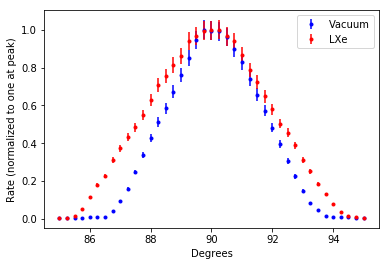

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize, integrate

vac_filename = "/global/homes/r/rjsmith/OpticalPlotting/Vacuum measurements after 3rd xenon run/Jan 9-12/Power/2019_01_10__09_36_28.txt"
vac_file = open(vac_filename)
vac_lines = vac_file.readlines()
vac_data = np.loadtxt(vac_filename,skiprows = 12)
vac_incidentpower = float(vac_lines[8][16:-1])
vac_intensities = np.array([datum[1] for datum in vac_data])
vac_relative_intensities = vac_intensities/vac_incidentpower
vac_angles = np.array([datum[0] for datum in vac_data])
vac_err = np.sqrt(20**2+(0.05*vac_intensities)**2)
vac_relative_err = vac_err/vac_incidentpower

lxe_filename = "/global/homes/r/rjsmith/OpticalPlotting/3rd Xenon Run Measurements/Power and background at 178 nm/2018_12_19__16_42_47.txt"
lxe_file = open(lxe_filename)
lxe_lines = lxe_file.readlines()
lxe_data = np.loadtxt(lxe_filename,skiprows = 12)
lxe_incidentpower = float(lxe_lines[8][16:-1])
lxe_intensities = np.array([datum[1] for datum in lxe_data])
lxe_relative_intensities = lxe_intensities/lxe_incidentpower
lxe_angles = np.array([datum[0] for datum in lxe_data])
lxe_err = np.sqrt(100**2+(0.05*lxe_intensities)**2)
lxe_relative_err = lxe_err/lxe_incidentpower

def gauss(x,A,mu,sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
def beam_model(angle,A,sigma,mu):
    return list(map(lambda x: A*integrate.quad(gauss,x-2,x+2,args=(A,mu,sigma))[0],angle))

vac_fit_params, vac_fit_cov = optimize.curve_fit(beam_model,vac_angles,vac_relative_intensities,p0=[1,10,90])
lxe_fit_params, lxe_fit_cov = optimize.curve_fit(beam_model,lxe_angles,lxe_relative_intensities,p0 = [1,10,90])

plt.errorbar(vac_angles,vac_relative_intensities,vac_relative_err,fmt ='b.')
#plt.plot(vac_angles,beam_model(vac_angles,vac_fit_params[0],vac_fit_params[1],vac_fit_params[2]),'b')
plt.errorbar(lxe_angles,lxe_relative_intensities,lxe_relative_err,fmt ='r.')
#plt.plot(lxe_angles,beam_model(lxe_angles,lxe_fit_params[0],lxe_fit_params[1],lxe_fit_params[2]),'r')
plt.legend(['Vacuum','LXe'])
plt.xlabel('Degrees')
plt.ylabel('Rate (normalized to one at peak)')

In [151]:
print(vac_fit_params)

[  0.95325035   0.89640258  90.09098383]


In [152]:
print(lxe_fit_params)

[  1.22307955   1.51905023  89.92629975]


"\ndef gauss(x,A,mu,sigma):\n    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)\ndef beam_model(angle,A,sigma,mu):\n    return list(map(lambda x: A*integrate.quad(gauss,x-2,x+2,args=(A,mu,sigma))[0],angle))\n\nvac_fit_params, vac_fit_cov = optimize.curve_fit(beam_model,vac_angles,vac_relative_intensities,p0=[1,10,90])\nlxe_fit_params, lxe_fit_cov = optimize.curve_fit(beam_model,lxe_angles,lxe_relative_intensities,p0 = [1,10,90])\n\nplt.errorbar(vac_angles,vac_relative_intensities,vac_relative_err,fmt ='b.')\nplt.plot(vac_angles,beam_model(vac_angles,vac_fit_params[0],vac_fit_params[1],vac_fit_params[2]),'b')\nplt.errorbar(lxe_angles,lxe_relative_intensities,lxe_relative_err,fmt ='r.')\nplt.plot(lxe_angles,beam_model(lxe_angles,lxe_fit_params[0],lxe_fit_params[1],lxe_fit_params[2]),'r')\nplt.legend(['Vacuum fit','LXe fit','Vacuum data','LXe data'])\nplt.xlabel('Degrees')\nplt.ylabel('Rate (normalized to one at peak)')"

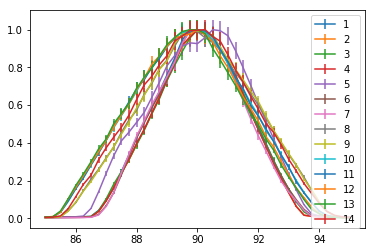

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize, integrate

vac_filename = ["/global/homes/r/rjsmith/OpticalPlotting/Vacuum measurements after 3rd xenon run/Jan 9-12/Power/2019_01_10__09_36_28.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/vuv_height_comparison_and_first_data/807NX turn/Center of sample/2018_08_29__15_50_53.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/vuv_height_comparison_and_first_data/M18 turn/center of sample/2018_08_30__15_10_09.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/vuv_height_comparison_and_first_data/Skived LZ/center of sample/2018_08_29__17_16_31.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/vuv_height_comparison_and_first_data/Spectralon/Centered, 400 nm/2018_09_04__16_34_01.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/Vacuum measurements after 3rd xenon run/Jan 14/Background/400nm/2019_01_14__13_48_00.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/Vacuum measurements after 3rd xenon run/Jan 14/Background/500nm/2019_01_14__15_51_57.txt"]
vac_file = []
vac_lines = []
vac_data = []
vac_incidentpower = []
vac_intensities = []
vac_relative_intensities = []
vac_angles = []
vac_err = []
vac_relative_err = []

for filename in vac_filename:
    vac_file.append(open(filename))
    vac_data.append(np.loadtxt(filename,skiprows = 12))


for i in range(len(vac_file)):
    vac_lines.append(vac_file[i].readlines())
    vac_intensities.append(np.array([datum[1] for datum in vac_data[i]]))
    vac_incidentpower.append(max(vac_intensities[i]))
    vac_relative_intensities.append(vac_intensities[i]/vac_incidentpower[i])
    vac_angles.append(np.array([datum[0] for datum in vac_data[i]]))
    vac_err.append(np.sqrt(20**2+(0.05*vac_intensities[i])**2))
    vac_relative_err.append(vac_err[i]/vac_incidentpower[i])
    plt.errorbar(vac_angles[i],vac_relative_intensities[i],vac_relative_err[i])


    
lxe_filename = ["/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/first measurements with no bubbles in cell 11-01-2/Initial power and background at 178 nm/2018_11_01__14_53_11.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/first measurements with no bubbles in cell 11-01-2/Sample 3/Power/2018_11_01__17_27_22.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/2nd Xenon Run Measurements/Sample 9 no bubbles/After getter/2018_12_03__10_45_16.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/2nd Xenon Run Measurements/Sample 9 lower pressure/2018_12_05__13_18_24.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/2nd Xenon Run Measurements/Sample 9 medium pressure/2018_12_05__15_23_35.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/2nd Xenon Run Measurements/Sample 9 higher pressure/2018_12_05__17_00_20.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/3rd Xenon Run Measurements/Power and background at 178 nm/2018_12_19__16_42_47.txt"]

lxe_file = []
lxe_lines = []
lxe_data = []
lxe_incidentpower = []
lxe_intensities = []
lxe_relative_intensities = []
lxe_angles = []
lxe_err = []
lxe_relative_err = []

for filename in lxe_filename:
    lxe_file.append(open(filename))
    lxe_data.append(np.loadtxt(filename,skiprows = 12))


for i in range(len(lxe_file)):
    lxe_lines.append(lxe_file[i].readlines())
    lxe_intensities.append(np.array([datum[1] for datum in lxe_data[i]]))
    lxe_incidentpower.append(max(lxe_intensities[i]))
    lxe_relative_intensities.append(lxe_intensities[i]/lxe_incidentpower[i])
    lxe_angles.append(np.array([datum[0] for datum in lxe_data[i]]))
    lxe_err.append(np.sqrt(20**2+(0.05*lxe_intensities[i])**2))
    lxe_relative_err.append(lxe_err[i]/lxe_incidentpower[i])
    plt.errorbar(lxe_angles[i],lxe_relative_intensities[i],lxe_relative_err[i])


plt.legend(['1','2','3','4','5','6','7','8','9','10','11','12','13','14'])

'''
def gauss(x,A,mu,sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
def beam_model(angle,A,sigma,mu):
    return list(map(lambda x: A*integrate.quad(gauss,x-2,x+2,args=(A,mu,sigma))[0],angle))

vac_fit_params, vac_fit_cov = optimize.curve_fit(beam_model,vac_angles,vac_relative_intensities,p0=[1,10,90])
lxe_fit_params, lxe_fit_cov = optimize.curve_fit(beam_model,lxe_angles,lxe_relative_intensities,p0 = [1,10,90])

plt.errorbar(vac_angles,vac_relative_intensities,vac_relative_err,fmt ='b.')
plt.plot(vac_angles,beam_model(vac_angles,vac_fit_params[0],vac_fit_params[1],vac_fit_params[2]),'b')
plt.errorbar(lxe_angles,lxe_relative_intensities,lxe_relative_err,fmt ='r.')
plt.plot(lxe_angles,beam_model(lxe_angles,lxe_fit_params[0],lxe_fit_params[1],lxe_fit_params[2]),'r')
plt.legend(['Vacuum fit','LXe fit','Vacuum data','LXe data'])
plt.xlabel('Degrees')
plt.ylabel('Rate (normalized to one at peak)')'''

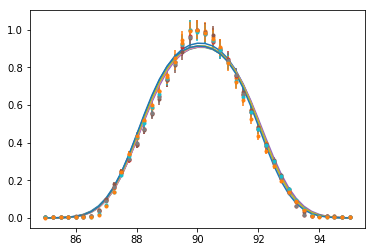

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize, integrate

def gauss(x,A,mu,sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
def beam_model(angle,A,sigma,mu,width):
    return list(map(lambda x: A*integrate.quad(gauss,x-2,x+2,args=(A,mu,sigma))[0],angle))

vac_filename = ["/global/homes/r/rjsmith/OpticalPlotting/Vacuum measurements after 3rd xenon run/Jan 9-12/Power/2019_01_10__09_36_28.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/vuv_height_comparison_and_first_data/807NX turn/Center of sample/2018_08_29__15_50_53.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/vuv_height_comparison_and_first_data/M18 turn/center of sample/2018_08_30__15_10_09.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/vuv_height_comparison_and_first_data/Skived LZ/center of sample/2018_08_29__17_16_31.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/Vacuum measurements after 3rd xenon run/Jan 14/Background/400nm/2019_01_14__13_48_00.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/Vacuum measurements after 3rd xenon run/Jan 14/Background/500nm/2019_01_14__15_51_57.txt"]

vac_file = []
vac_lines = []
vac_data = []
vac_incidentpower = []
vac_intensities = []
vac_relative_intensities = []
vac_angles = []
vac_err = []
vac_relative_err = []
vac_fit_params = []
vac_fit_cov = []

for filename in vac_filename:
    vac_file.append(open(filename))
    vac_data.append(np.loadtxt(filename,skiprows = 12))


for i in range(len(vac_file)):
    vac_lines.append(vac_file[i].readlines())
    vac_intensities.append(np.array([datum[1]-100 for datum in vac_data[i]]))
    vac_incidentpower.append(max(vac_intensities[i]))
    vac_relative_intensities.append(vac_intensities[i]/vac_incidentpower[i])
    vac_angles.append(np.array([datum[0] for datum in vac_data[i]]))
    vac_err.append(np.sqrt(20**2+(0.05*vac_intensities[i])**2))
    vac_relative_err.append(vac_err[i]/vac_incidentpower[i])
    vac_fit_params.append(optimize.curve_fit(beam_model,vac_angles[i],vac_relative_intensities[i],p0=[1,1,90,4])[0])
    vac_fit_cov.append(optimize.curve_fit(beam_model,vac_angles[i],vac_relative_intensities[i],p0=[1,1,90,4])[1])
    plt.plot(vac_angles[i],beam_model(vac_angles[i],vac_fit_params[i][0],vac_fit_params[i][1],vac_fit_params[i][2],vac_fit_params[i][3]))
    plt.errorbar(vac_angles[i],vac_relative_intensities[i],vac_relative_err[i],fmt='.')

vac_sigmas = [paramlist[1] for paramlist in vac_fit_params]

In [9]:
print(vac_sigmas)

[0.89613890723040546, 0.8688096634990139, 0.90481241889627206, 0.86850962431187384, 0.88428067105055308, 0.85999999747399969]


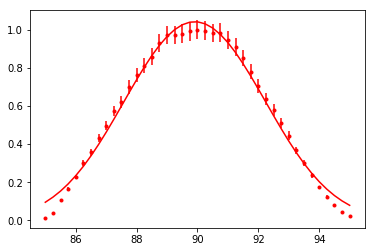

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize, integrate

def gauss(x,A,mu,sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
def beam_model(angle,A,sigma,mu,width):
    return list(map(lambda x: A*integrate.quad(gauss,x-2,x+2,args=(A,mu,sigma))[0],angle))

lxe_filename = ['/global/homes/r/rjsmith/OpticalPlotting/2nd Xenon Run Measurements/165 nm measurements/Power and sample 9 reflectivity measurements/2018_12_06__13_40_05.txt']
lxe_file = []
lxe_lines = []
lxe_data = []
lxe_incidentpower = []
lxe_intensities = []
lxe_relative_intensities = []
lxe_angles = []
lxe_err = []
lxe_relative_err = []
lxe_fit_params = []
lxe_fit_cov = []

for filename in lxe_filename:
    lxe_file.append(open(filename))
    lxe_data.append(np.loadtxt(filename,skiprows = 12))

lxecolorlist= ['r','g','b','m','c','y','k']
for i in range(len(lxe_file)):
    lxe_lines.append(lxe_file[i].readlines())
    lxe_intensities.append(np.array([datum[1]-100 for datum in lxe_data[i]]))
    lxe_incidentpower.append(max(lxe_intensities[i]))
    lxe_relative_intensities.append(lxe_intensities[i]/lxe_incidentpower[i])
    lxe_angles.append(np.array([datum[0] for datum in lxe_data[i]]))
    lxe_err.append(np.sqrt(20**2+(0.05*lxe_intensities[i])**2))
    lxe_relative_err.append(lxe_err[i]/lxe_incidentpower[i])
    lxe_fit_params.append(optimize.curve_fit(beam_model,lxe_angles[i],lxe_relative_intensities[i],p0=[1,1,90,4])[0])
    lxe_fit_cov.append(optimize.curve_fit(beam_model,lxe_angles[i],lxe_relative_intensities[i],p0=[1,1,90,4])[1])
    plt.plot(lxe_angles[i],beam_model(lxe_angles[i],lxe_fit_params[i][0],lxe_fit_params[i][1],lxe_fit_params[i][2],lxe_fit_params[i][3]),lxecolorlist[i])
    plt.errorbar(lxe_angles[i],lxe_relative_intensities[i],lxe_relative_err[i],fmt=lxecolorlist[i]+'.')

lxe_sigmas = [paramlist[1] for paramlist in lxe_fit_params]
 

In [11]:
print(lxe_sigmas)

[1.9148604392682234]


In [12]:
print(np.mean(vac_sigmas))

0.880425213744


In [13]:
print(np.std(vac_sigmas))

0.0160759252085


In [14]:
print(np.mean(lxe_sigmas)/np.mean(vac_sigmas))

2.17492685282


In [7]:
print(((np.std(lxe_sigmas)/np.mean(vac_sigmas))**2+(np.mean(lxe_sigmas)*np.std(vac_sigmas)/(np.mean(vac_sigmas)**2))**2)**0.5)

NameError: name 'vac_sigmas' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize, integrate

def gauss(x,A,mu,sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
def beam_model(angle,A,sigma,mu,width):
    return list(map(lambda x: A*integrate.quad(gauss,x-2,x+2,args=(A,mu,sigma))[0],angle))

lxe_filename = ["/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/first measurements with no bubbles in cell 11-01-2/Initial power and background at 178 nm/2018_11_01__14_53_11.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/first measurements with no bubbles in cell 11-01-2/Sample 3/Power/2018_11_01__17_27_22.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/2nd Xenon Run Measurements/Sample 9 no bubbles/After getter/2018_12_03__10_45_16.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/2nd Xenon Run Measurements/Sample 9 lower pressure/2018_12_05__13_18_24.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/2nd Xenon Run Measurements/Sample 9 medium pressure/2018_12_05__15_23_35.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/2nd Xenon Run Measurements/Sample 9 higher pressure/2018_12_05__17_00_20.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/3rd Xenon Run Measurements/Power and background at 178 nm/2018_12_19__16_42_47.txt"]

lxe_file = []
lxe_lines = []
lxe_data = []
lxe_incidentpower = []
lxe_intensities = []
lxe_relative_intensities = []
lxe_angles = []
lxe_err = []
lxe_relative_err = []
lxe_fit_params = []
lxe_fit_cov = []

for filename in lxe_filename:
    lxe_file.append(open(filename))
    lxe_data.append(np.loadtxt(filename,skiprows = 12))

lxecolorlist= ['r','g','b','m','c','y','k']
for i in range(len(lxe_file)):
    lxe_lines.append(lxe_file[i].readlines())
    lxe_intensities.append(np.array([datum[1]-100 for datum in lxe_data[i]]))
    lxe_incidentpower.append(max(lxe_intensities[i]))
    lxe_relative_intensities.append(lxe_intensities[i]/lxe_incidentpower[i])
    lxe_angles.append(np.array([datum[0] for datum in lxe_data[i]]))
    lxe_err.append(np.sqrt(20**2+(0.05*lxe_intensities[i])**2))
    lxe_relative_err.append(lxe_err[i]/lxe_incidentpower[i])
    lxe_fit_params.append(optimize.curve_fit(beam_model,lxe_angles[i],lxe_relative_intensities[i],p0=[1,1,90,4])[0])
    lxe_fit_cov.append(optimize.curve_fit(beam_model,lxe_angles[i],lxe_relative_intensities[i],p0=[1,1,90,4])[1])
    plt.plot(lxe_angles[i],beam_model(lxe_angles[i],lxe_fit_params[i][0],lxe_fit_params[i][1],lxe_fit_params[i][2],lxe_fit_params[i][3]),lxecolorlist[i])
    plt.errorbar(lxe_angles[i],lxe_relative_intensities[i],lxe_relative_err[i],fmt=lxecolorlist[i]+'.')

lxe_sigmas = [paramlist[1] for paramlist in lxe_fit_params]
 